Lesson 2

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def linear_convection(nx, L = 2.0, c = 1.0, dt = 0.025, nt = 20):
    #discretize spatial grid
    dx = L / (nx-1) 
    x = numpy.linspace(0.0, L, num=nx)
    
    #inital conditions
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    
    #integrate over time
    u = u0.copy()
    for n in range(1,nt):
        u[1:] = u[1:] - c * (dt/dx) * (u[1:] - u[:-1])
    
    #plot solution
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

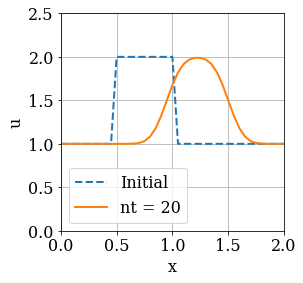

In [4]:
linear_convection(41) #with 41 spatial grid points

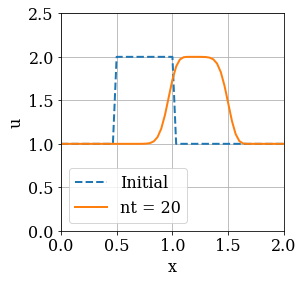

In [5]:
linear_convection(61)

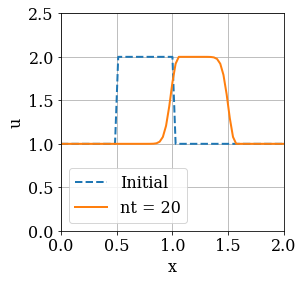

In [6]:
linear_convection(71)

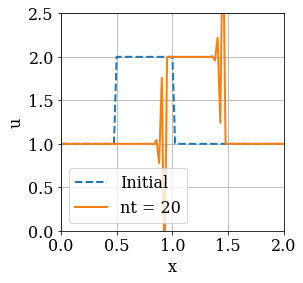

In [7]:
linear_convection(85)

In [10]:
def linear_convection_cfl(nx, L = 2.0, c = 1.0, sigma = 0.5, nt = 20):
    #discretize spatial grid
    dx = L / (nx -1)
    x = numpy.linspace(0.0, L, num = nx)
    
    #compute time-step based on CFL constraint
    dt = sigma * (dx / c)
    
    #set initial conditions
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x>=0.5, x<=1.0))
    u0[mask] = 2.0
    
    #integrate
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * (dt / dx) * (u[1:] - u[:-1])
        
    #plot!
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

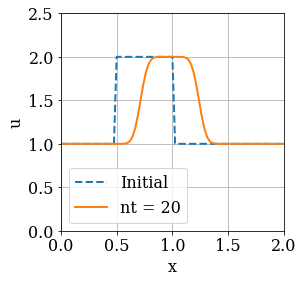

In [11]:
linear_convection_cfl(85)

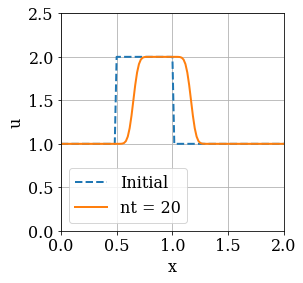

In [12]:
linear_convection_cfl(121)

Lesson 3

In [13]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [14]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [15]:
#parameters
nx = 41 #spatial grid points
L = 2.0 #length of domain
dx = L / (nx - 1) #spatial grid size
nu = 0.3 #viscosity
sigma = 0.2 #CFL limit
dt = sigma * dx**2 / nu #timestep size
nt = 20 #number of time steps

#find grid point coordinates
x = numpy. linspace(0.0, L, num = nx)

#initial conditions
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

In [17]:
#Integrate!
u = u0.copy()
for n in range(nt):
    u[1:-1] = u[1:-1] + nu * (dt / dx**2) * (u[2:] - 2 * u[1:-1] + u[:-2])

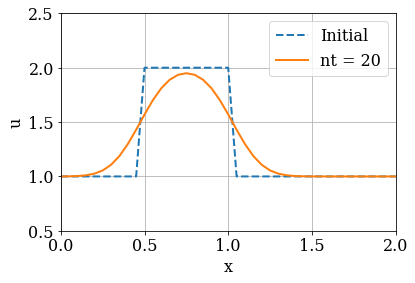

In [18]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend(loc='upper right')
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5);

In [19]:
from matplotlib import animation
from IPython.display import HTML

In [22]:
def diffusion(u0, sigma = 0.5, nt = 20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist

In [23]:
#compute history
u_hist = diffusion(u0, sigma = sigma, nt = nt)

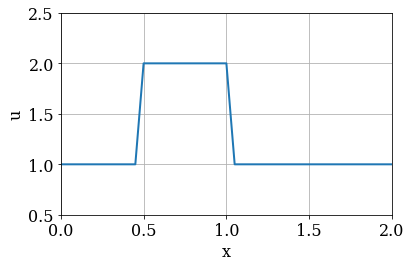

In [24]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
line = pyplot.plot(x, u0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5)
fig.tight_layout()

In [25]:
def update_plot(n, u_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

In [26]:
#ANIMATION
anim = animation.FuncAnimation(fig, update_plot, frames=nt, 
                               fargs=(u_hist,),interval=100)

In [27]:
# Display the video.
HTML(anim.to_html5_video())
